# The Central Limit Theorem

In [3]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
from IPython.display import display

In [4]:
customers = pd.read_csv('Wholesale_customers_data.csv')
customers.Region = customers.Region.astype('category')
customers.Channel = customers.Channel.astype('category')
customer_features = customers.select_dtypes(int)

display(customers.info())
display(customers.describe())

TypeError: include and exclude must both be non-string sequences

<a id='review-statistics-parameters'></a>

### Review: Sample Statistics and Parameters

---

Recall that we use sample statistics to estimate population parameters. Our goal is to calculate sample statistics and then rely on properties of a random sample (and perhaps additional assumptions) to make inferences that we can generalize to the larger population of interest.

Below is a table comparing some example sample statistics and population parameters:

Metric  | Statistic  | Parameter 
-------- | ---------- | -------- 
mean   | $$\bar{x} = \frac{\sum x}{n}$$ | $$ \mu = \frac{\sum x}{N} $$      
standard deviation   | $$ s = \sqrt{\frac{\sum_i (x_i - \bar{x})^2}{n-1}} $$ | $$ \sigma = \sqrt{\frac{\sum_i (x_i - \mu)^2}{N} } $$
correlation   | $$ r = \frac{\hat{Cov}(X, Y)}{s_X s_Y} $$ | $$ \rho = \frac{Cov(X, Y)}{\sigma_X \sigma_Y} $$

## The Normal Distribution

---

The normal distribution is arguably the most commonly used distribution in all of statistics. **Normality** is an assumption that underlies many statistical tests and serves as a convenient model for the distribution of many (but not all!) variables.

The normal distribution relies on two parameters: 
- The population mean
- The population standard deviation 

If a variable follows a Normal distribution exactly, its mean, median, and mode will all be equal.

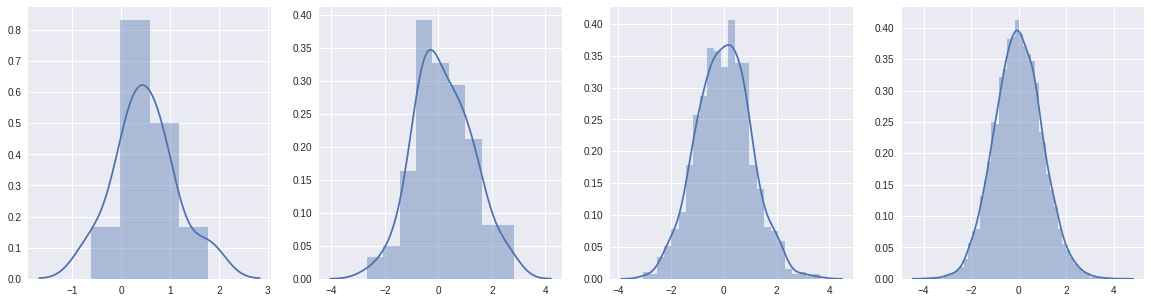

In [5]:
fig = plt.figure(figsize=(20,5))

for i in range(1,5):
    yy = np.random.normal(size=10**i)
    fig.add_subplot(1,4,i)
    sns.distplot(yy)

<a id='zdist-rule'></a>

### The 68-95-99.7 Rule

---

It is often beneficial to identify how extreme (or far away from the expected value) a particular observation is within the context of a distribution. 

It is possible to show that, for a Normal distribution:
- 68% of observations from a population will fall within $\pm 1$ standard deviation of the population mean.
- 95% of observations from a population will fall within $\pm 2$ standard deviations of the population mean.
- 99.7% of observations from a population will fall within $\pm 3$ standard deviations of the population mean.

In [6]:
titanic = pd.read_csv('titanic.csv')
titanic_age = titanic.Age.dropna()

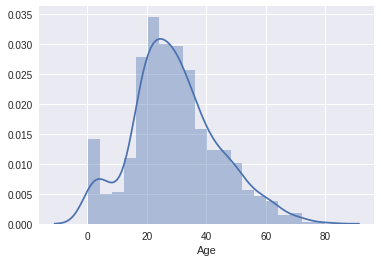

In [7]:
sns.distplot(titanic_age)

In [8]:
titanic_age_mean = titanic_age.mean()
titanic_age_std = titanic_age.std()
titanic_age_mean, titanic_age_std

(29.69911764705882, 14.526497332334042)

### Try it out

What percentage of passengers have an age between 15 and 45?

What percentage of passengers have an age above 30?

What percentage of passengers have an age between 15 and 60?

**Below is a visual representation of the 68-95-99.7 rule on the IQ distribution:**

In [ ]:
sns.distplot(titanic_age)
plt.axvline(titanic_age_mean, color='black', lw=3)
plt.axvline(titanic_age_mean - titanic_age_std, color='black', lw=2, ls="dashed")
plt.axvline(titanic_age_mean + titanic_age_std, color='black', lw=2, ls="dashed")
plt.axvline(titanic_age_mean - 2*titanic_age_std, color='black', lw=1, ls="dashed")
plt.axvline(titanic_age_mean + 2*titanic_age_std, color='black', lw=1, ls="dashed")
plt.axvline(titanic_age_mean - 3*titanic_age_std, color='black', lw=.5, ls="dashed")
plt.axvline(titanic_age_mean + 3*titanic_age_std, color='black', lw=.5, ls="dashed")

## The z-score


The z-score of an observation quantifies how many standard deviations the observation is away from the population mean:

### $$ z_i = \frac{x_i - \text{population mean of x}}{\text{standard deviation of x}} $$


In [ ]:
customer_feature_z_scores = (customer_features - customer_features.mean())/customer_features.std()

In [ ]:
sample = customer_feature_z_scores.sample(4)
sample

In [ ]:
sample.plot(kind='bar', figsize=(20,5))
labels = ["Sample {}".format(i) for i in sample.index]
plt.xticks(range(samples_cpy.shape[0]+2),labels);

## Central Limit Theorem

---

Normality underlies many of the inferential techniques that we use in data science.

Consider the random variable $X$. We can take a sample from this population of size $n$ and find the mean of that sample. Let's call this sample mean $x_1$. We can take another sample from this population, also of size $n$, and find the mean of that sample. Let's call this sample mean $x_1$. We can do this over and over until we've calculated the mean of every possible sample of size $n$. If we plotted every sample mean on a histogram, we get another distribution called "the sampling distribution of $\bar{X}$."

**This distribution, the sampling distribution of $\bar{X}$, is Normally distributed even if the distribution of $X$ is not.** (That is, unless some rare conditions are violated).

We can formally define [the central limit theorm](http://homepages.math.uic.edu/~bpower6/stat101/Sampling%20Distributions.pdf) like so:

> In probability theory, the central limit theorem states that, when independent random variables are added, their sum tends toward a normal distribution (commonly known as a bell curve), even if the original variables themselves are not normally distributed. In more precise terms, given certain conditions, the arithmetic mean of a sufficiently large number of iterates of independent random variables — each with a well-defined (finite) expected value and finite variance — will be approximately normally distributed, regardless of the underlying distribution.

Some properties that arise from the central limit theorem include:

> If $X ~ N(\mu,\sigma)$, then $\bar{X}$ is exactly $N(\mu,\frac{\sigma}{\sqrt{n}})$

> If $X$ is not normally distributed, then $\bar{X}$ is approximately $N(\mu,\frac{\sigma}{\sqrt{n}})$ if the sample size $n$ is at least 30. As $n$ increases, $\bar{X}$ becomes asymptotically normally distributed.

> If $\bar{X}$ is normally distributed, then we can use inferential methods that rely on our sample mean, $\bar{x}$

<a id='additional-resources'></a>

### Additional resources

---

http://blog.vctr.me/posts/central-limit-theorem.html

http://www.usablestats.com/lessons/central_limit

http://blog.minitab.com/blog/michelle-paret/explaining-the-central-limit-theorem-with-bunnies-and-dragons-v2
